# Test on Unbalanced Test Data

In [1]:
import os
import numpy as np
import os.path

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    # set up Python environment: numpy for numerical routines, and matplotlib for plotting
import h5py
import caffe
from caffe.proto import caffe_pb2
from google.protobuf import text_format
import sensSpec
#plot roc_curve:
import roc_curve
from helper.cacheResults import listSave,listRead

print("Done importing")

soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
print_soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femS', 'fire',
       'ftStp', 'knock', 'phone', 'piano']

Done importing


# 1. SigmoidCrossEntropy

**with dropout**

In [22]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/03/deploy.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/03/te'

it_list_SCE,sens_list_SCE,spec_list_SCE,bal_acclist_SCE = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/03/te',
                                                      s_flag=True,
                                                                                  threshold=0.5 ,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results03.npy'
tmpdata = np.array([sens_list_SCE,spec_list_SCE,bal_acclist_SCE])
np.save(saveFileName,tmpdata)

20 model files


In [23]:
sensSpec.printResult(print_soundTypes,sens_list_SCE,spec_list_SCE,bal_acclist_SCE)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.152096 	 0.999168 	 0.575632
baby 	 0.942346 	 0.991179 	 0.966763
crash 	 0.666667 	 0.972213 	 0.819440
dog 	 0.876963 	 0.999270 	 0.938117
engine 	 0.421233 	 0.972967 	 0.697100
femS 	 0.940075 	 0.999701 	 0.969888
fire 	 0.903234 	 0.985964 	 0.944599
ftStp 	 0.947432 	 0.989557 	 0.968495
knock 	 1.000000 	 0.998813 	 0.999407
phone 	 0.713499 	 0.999743 	 0.856621
piano 	 0.709786 	 0.992497 	 0.851142


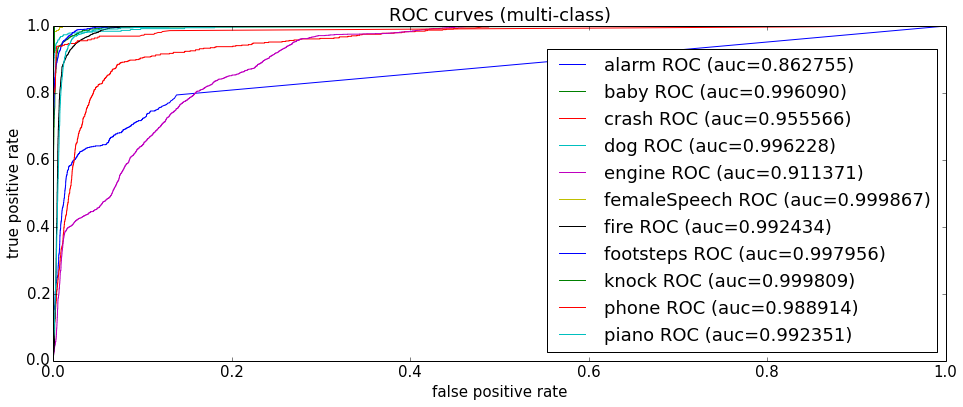

In [24]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/03/te_iter_100000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)


**without dropout**

In [27]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/18/deploy.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/18/te'
it_list_SCE_nd,sens_list_SCE_nd,spec_list_SCE_nd,bal_acclist_SCE_nd = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/18/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results18.npy'
tmpdata = np.array([sens_list_SCE_nd,spec_list_SCE_nd,bal_acclist_SCE_nd])
np.save(saveFileName,tmpdata)

20 model files


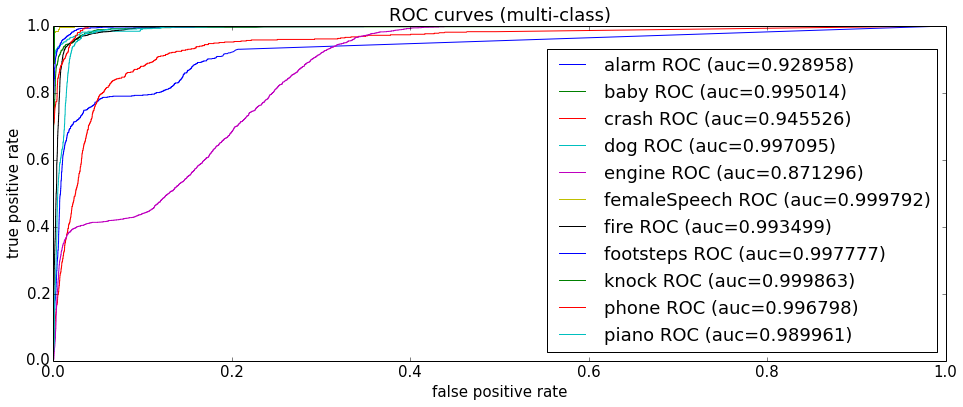

In [26]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/18/te_iter_100000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)
# candidates1 = (fpr<0.155)
# candidates2 = (fpr>0.151)
# candidates = (candidates1==candidates2).astype(int)
# print thresholds[np.where(candidates==1)]

### Experiment with only 'ratemap' feature(without amsFeature)

In [31]:
## this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/sabik/experiments/20/deploy_test.prototxt'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/20/te'
it_list_SCE_exp,sens_list_SCE_exp,spec_list_SCE_exp,bal_acclist_SCE_exp = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix= '/mnt/raid/dnn/cindy/modelfiles/20/te',
                                                      s_flag=True,
                                                                                              threshold=0.5,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results20.npy'
tmpdata = np.array([sens_list_SCE_exp,spec_list_SCE_exp,bal_acclist_SCE_exp])
np.save(saveFileName,tmpdata)

20 model files


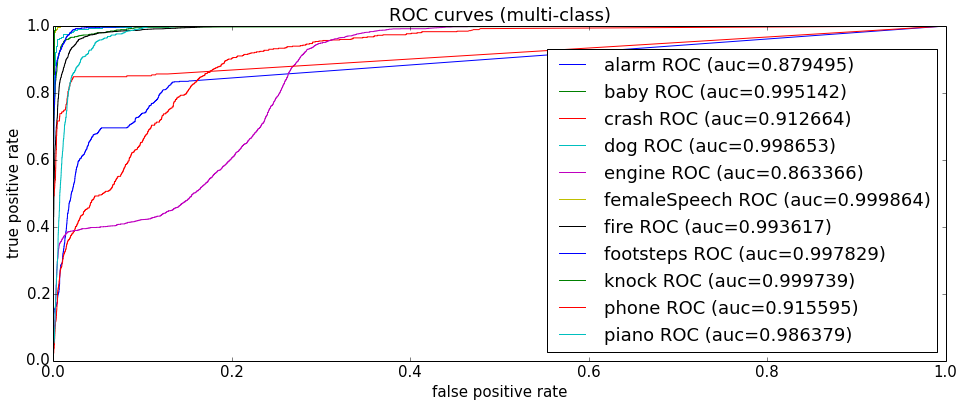

In [32]:
fpath = '/mnt/raid/dnn/cindy/modelfiles/20/te_iter_100000.hdf5'
key_est = 'predict'
fpr,tpr,thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)

In [9]:
sensSpec.printResult(print_soundTypes,sens_list_SCE_exp,spec_list_SCE_exp,bal_acclist_SCE_exp)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.153293 	 0.998643 	 0.575968
baby 	 0.904573 	 0.994355 	 0.949464
crash 	 0.359568 	 0.983241 	 0.671404
dog 	 0.876963 	 0.998626 	 0.937795
engine 	 0.372432 	 0.987631 	 0.680031
femS 	 0.928839 	 0.999616 	 0.964227
fire 	 0.936366 	 0.978317 	 0.957341
ftStp 	 0.948036 	 0.988468 	 0.968252
knock 	 0.989011 	 0.999152 	 0.994082
phone 	 0.495868 	 0.998928 	 0.747398
piano 	 0.546682 	 0.991181 	 0.768931


### t-test

In [33]:
print '\t SCE \t \t \t \t \t \t SCE_exp'
print 'class \t sens \t \t spec \t \t bal \t \t sens \t \t spec \t \t bal'
for s in range(len(print_soundTypes)):
    print '%s \t %f \t %f \t %f \t %f \t %f \t %f'%(print_soundTypes[s],
                                              sens_list_SCE[-1,s],
                                              spec_list_SCE[-1,s],
                                              bal_acclist_SCE[-1,s],
                                              sens_list_SCE_exp[-1,s],
                                              spec_list_SCE_exp[-1,s],
                                              bal_acclist_SCE_exp[-1,s])

	 SCE 	 	 	 	 	 	 SCE_exp
class 	 sens 	 	 spec 	 	 bal 	 	 sens 	 	 spec 	 	 bal
alarm 	 0.152096 	 0.999168 	 0.575632 	 0.153293 	 0.998643 	 0.575968
baby 	 0.942346 	 0.991179 	 0.966763 	 0.904573 	 0.994355 	 0.949464
crash 	 0.666667 	 0.972213 	 0.819440 	 0.359568 	 0.983241 	 0.671404
dog 	 0.876963 	 0.999270 	 0.938117 	 0.876963 	 0.998626 	 0.937795
engine 	 0.421233 	 0.972967 	 0.697100 	 0.372432 	 0.987631 	 0.680031
femS 	 0.940075 	 0.999701 	 0.969888 	 0.928839 	 0.999616 	 0.964227
fire 	 0.903234 	 0.985964 	 0.944599 	 0.936366 	 0.978317 	 0.957341
ftStp 	 0.947432 	 0.989557 	 0.968495 	 0.948036 	 0.988468 	 0.968252
knock 	 1.000000 	 0.998813 	 0.999407 	 0.989011 	 0.999152 	 0.994082
phone 	 0.713499 	 0.999743 	 0.856621 	 0.495868 	 0.998928 	 0.747398
piano 	 0.709786 	 0.992497 	 0.851142 	 0.546682 	 0.991181 	 0.768931


In [11]:
from scipy.stats import ttest_rel

SCE_sample = bal_acclist_SCE[-1]
SCE_exp_sample = bal_acclist_SCE_exp[-1]
# SCE_sample = sens_list_SCE[-1]
# SCE_exp_sample = sens_list_SCE_exp[-1]
# SCE_sample = spec_list_SCE[-1]
# SCE_exp_sample = spec_list_SCE_exp[-1]

t_stat,p = ttest_rel(SCE_sample,SCE_exp_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

t_stat:2.091201 	 prob:0.063002


* conclusion: only use ratemap feature gets a worse sensitivity

## plotting

In [30]:
#####################plot#####################
K = len(soundTypes)  #get number of class labels

#get y aixs range
accValues = np.concatenate((sens_list_SCE_ft,
                           sens_list_SCE,
                           spec_list_SCE_ft,
                           spec_list_SCE,
                          bal_acclist_SCE_ft,
                          bal_acclist_SCE))
minY = np.min(accValues)
maxY = np.max(accValues)
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('SigmoidCrossEntropy '+soundTypes[s],fontsize=24)
    
    plt.plot(it_list_SCE, sens_list_SCE[:,s],color='green',label='sens')
#     plt.plot(it_list_SCE_nd, sens_list_SCE_nd[:,s],'--',color='green',label='sens-no-dropout')
    plt.plot(it_list_SCE_exp, sens_list_SCE_exp[:,s],'--',color='green',label='sens-ratemap')
#     plt.plot(it_list_SCE_st, sens_list_SCE_st[:,s],color='green',label='sens-ratemap')
#     plt.plot(it_list_SCE_ft, sens_list_SCE_ft[:,s],'--',color='green',label='sens-ft')

    
    plt.plot(it_list_SCE, spec_list_SCE[:,s], color='red',label='spec')
#     plt.plot(it_list_SCE_nd, spec_list_SCE_nd[:,s], '--',color='red',label='spec-no-dropout')
    plt.plot(it_list_SCE_exp, spec_list_SCE_exp[:,s], '--',color='red',label='spec-ratemap')
#     plt.plot(it_list_SCE_st, spec_list_SCE_st[:,s], '--',color='red',label='spec-ratemap')
#     plt.plot(it_list_SCE_ft, spec_list_SCE_ft[:,s],'--',color='red',label='spec-ft')
    
    plt.plot(it_list_SCE, bal_acclist_SCE[:,s],color='blue',label='bal')
#     plt.plot(it_list_SCE_nd, bal_acclist_SCE_nd[:,s], '--',color='blue',label='bal-no-dropout')
    plt.plot(it_list_SCE_exp, bal_acclist_SCE_exp[:,s], '--',color='blue',label='bal-ratemap')
#     plt.plot(it_list_SCE_st, bal_acclist_SCE_st[:,s], '--',color='blue',label='bal-ratemap')
#     plt.plot(it_list_SCE_ft, bal_acclist_SCE_ft[:,s],'--',color='blue',label='bal-ft')
    
    plt.xlabel('iteration')
    plt.ylabel('sens-spec')
    
    plt.ylim((minY,maxY))
    # format x-axis ticks
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
#     plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')

    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
#     print '\t SCE \t SCE_ndrp '
    print '\t SCE \t \t SCE_ft '
    print 'sens\t %f \t %f'%(sens_list_SCE[-1,s],sens_list_SCE_ft[-1,s])
    print 'spec \t %f \t %f'%(spec_list_SCE[-1,s],spec_list_SCE_ft[-1,s])
    print 'bal \t %f \t %f'%(bal_acclist_SCE[-1,s],bal_acclist_SCE_ft[-1,s])

NameError: name 'sens_list_SCE_ft' is not defined

### average accuracy measure

In [13]:
avSensSCE = np.mean(sens_list_SCE,axis=1)
avSpecSCE = np.mean(spec_list_SCE,axis=1)
avBalSCE = np.mean(bal_acclist_SCE,axis=1)
avSensSCE_ft = np.mean(sens_list_SCE_ft,axis=1)
avSpecSCE_ft = np.mean(spec_list_SCE_ft,axis=1)
avBalSCE_ft = np.mean(bal_acclist_SCE_ft,axis=1)
accValues = np.concatenate((avSensSCE,
                           avSpecSCE,
                           avBalSCE,
                           avSensSCE_ft,
                          avSpecSCE_ft,
                          avBalSCE_ft))
minY = np.min(accValues)
maxY = np.max(accValues)
plt.figure(figsize=(20,6))
plt.suptitle('SigmoidCrossEntropy Average Performance',fontsize=24)
    
plt.plot(it_list_SCE, avSensSCE,color='green',label='sens')
plt.plot(it_list_SCE_ft, avSensSCE_ft,'--',color='green',label='sens-ft')

    
plt.plot(it_list_SCE, avSpecSCE, color='red',label='spec')
plt.plot(it_list_SCE_ft, avSpecSCE_ft,'--',color='red',label='spec-ft')
    
plt.plot(it_list_SCE, avBalSCE,color='blue',label='bal')
plt.plot(it_list_SCE_ft, avBalSCE_ft,'--',color='blue',label='bal-ft')
    
plt.xlabel('iteration')
plt.ylabel('sens-spec')
    
plt.ylim((minY,maxY))

ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})
plt.show()


NameError: name 'sens_list_SCE_ft' is not defined

### t-test

In [75]:
from scipy.stats import ttest_rel
SCE_sample = bal_acclist_SCE_exp[-1]
SCE_ft_sample = bal_acclist_SCE[-1]
print SCE_sample
print SCE_ft_sample
t_stat,p = ttest_rel(SCE_sample,SCE_ft_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

[ 0.57596822  0.94946367  0.6714043   0.93779492  0.68003135  0.96422727
  0.95734134  0.96825195  0.99408157  0.74739779  0.7689312 ]
[ 0.57563206  0.96676262  0.81943962  0.93811684  0.69709976  0.96988796
  0.94459898  0.96849467  0.9994065   0.85662065  0.85114166]
t_stat:-2.091201 	 prob:0.063002


# 2. SoftmaxWithLoss

**with dropout**

In [38]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/models_grouptalk_1/train_val_acc_unbal.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/jm/dnn_clean/models_grouptalk_1/gt_1'
it_list,sens_list,spec_list,bal_acclist = sensSpec.getSensSpec(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/grouptalk/te',
                                                      s_flag=False,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results_models_grouptalk_1.npy'
tmpdata = np.array([sens_list,spec_list,bal_acclist])
np.save(saveFileName,tmpdata)

20 model files


**without dropout**

In [39]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/16/train_val_acc_no_drop_unbal.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/16/te'
it_list_nd,sens_list_nd,spec_list_nd,bal_acclist_nd = sensSpec.getSensSpec(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/16/te_unbal',
                                                      s_flag=False,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results16.npy'
tmpdata = np.array([sens_list_nd,spec_list_nd,bal_acclist_nd])
np.save(saveFileName,tmpdata)

20 model files


### Compare SigmoidCrossEntropy and SoftmaxWithLoss

last iteration acc-measurements for alarm
	 Sft 	 	 SCE_ft 
sens	 0.177246 	 0.152096
spec 	 0.997899 	 0.999168
bal 	 0.587572 	 0.575632
last iteration acc-measurements for baby
	 Sft 	 	 SCE_ft 
sens	 0.950298 	 0.942346
spec 	 0.995854 	 0.991179
bal 	 0.973076 	 0.966763
last iteration acc-measurements for crash
	 Sft 	 	 SCE_ft 
sens	 0.705247 	 0.666667
spec 	 0.974904 	 0.972213
bal 	 0.840076 	 0.819440
last iteration acc-measurements for dog
	 Sft 	 	 SCE_ft 
sens	 0.874346 	 0.876963
spec 	 0.999099 	 0.999270
bal 	 0.936722 	 0.938117
last iteration acc-measurements for engine
	 Sft 	 	 SCE_ft 
sens	 0.416952 	 0.421233
spec 	 0.937547 	 0.972967
bal 	 0.677249 	 0.697100
last iteration acc-measurements for femaleSpeech
	 Sft 	 	 SCE_ft 
sens	 0.951311 	 0.940075
spec 	 0.999786 	 0.999701
bal 	 0.975549 	 0.969888
last iteration acc-measurements for fire
	 Sft 	 	 SCE_ft 
sens	 0.943729 	 0.903234
spec 	 0.987423 	 0.985964
bal 	 0.965576 	 0.944599
last iteration acc-meas

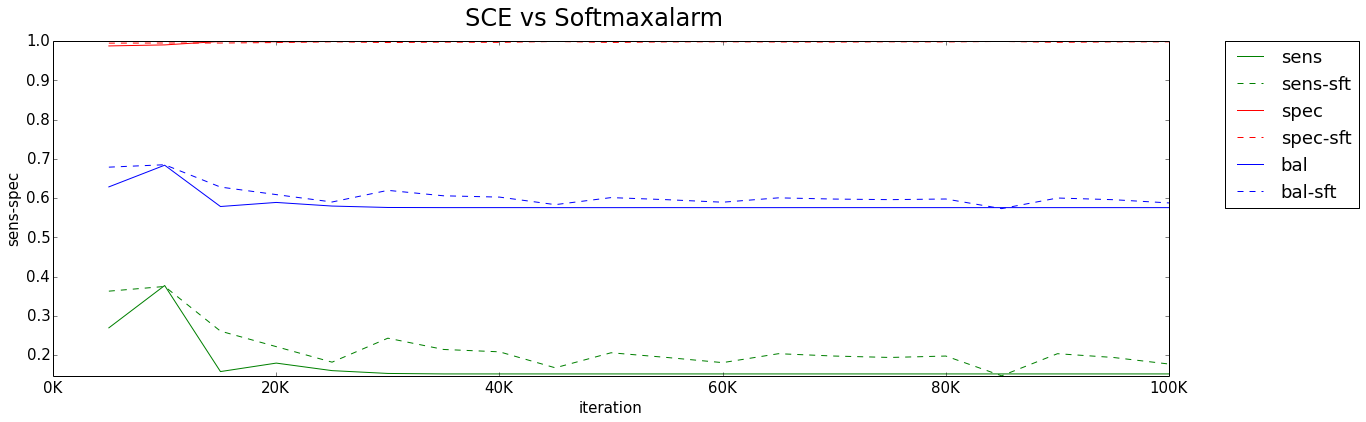

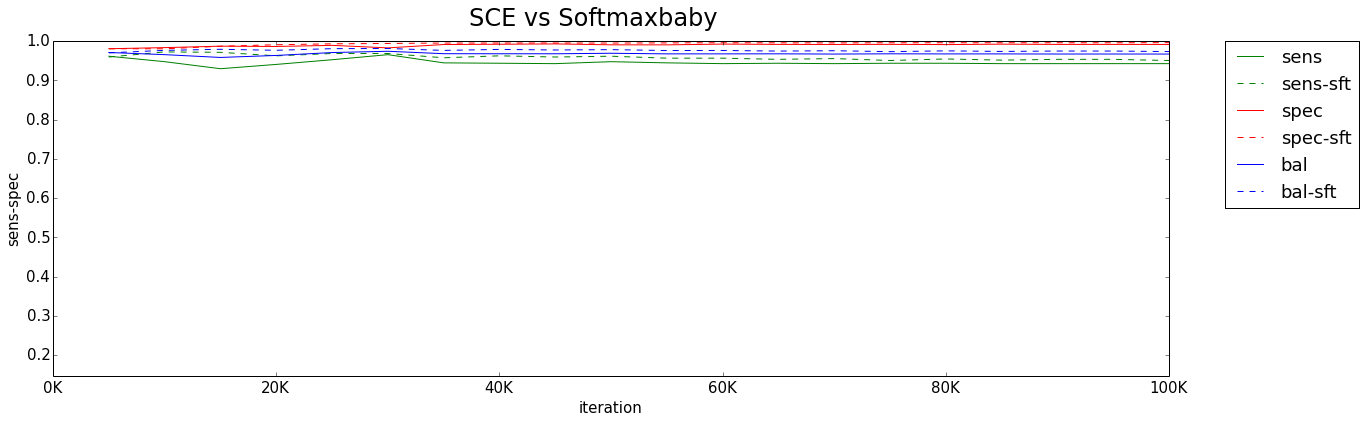

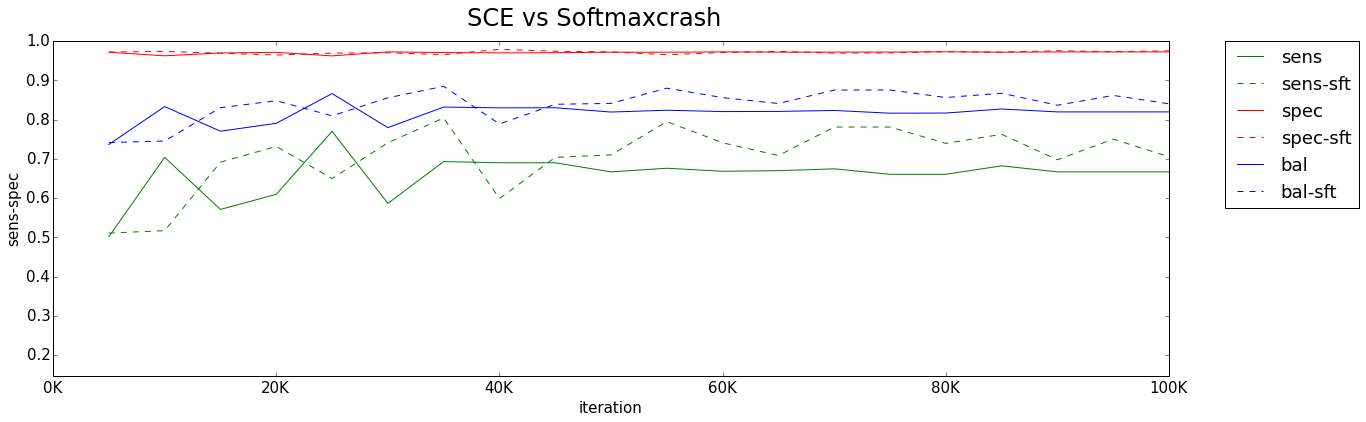

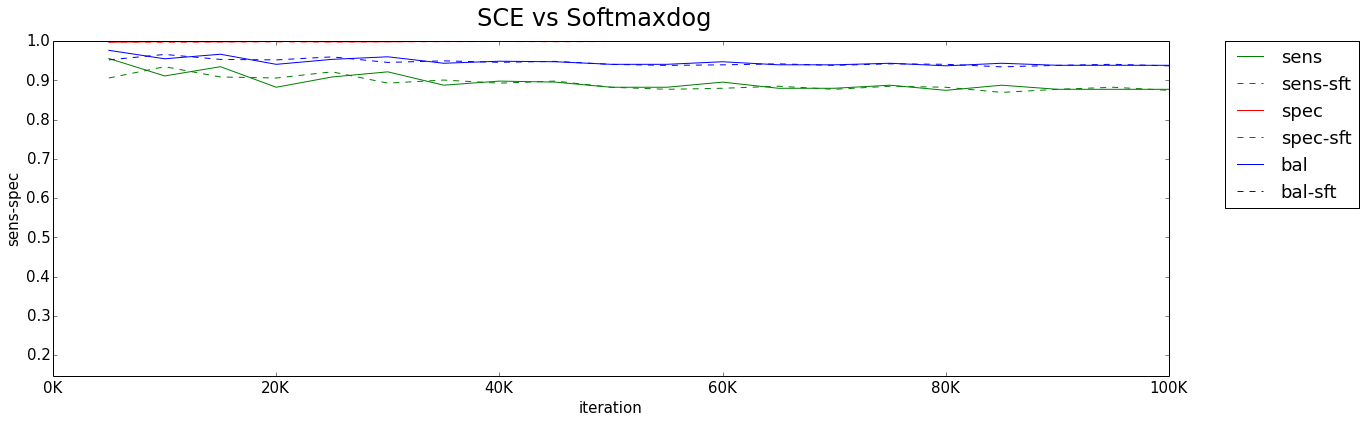

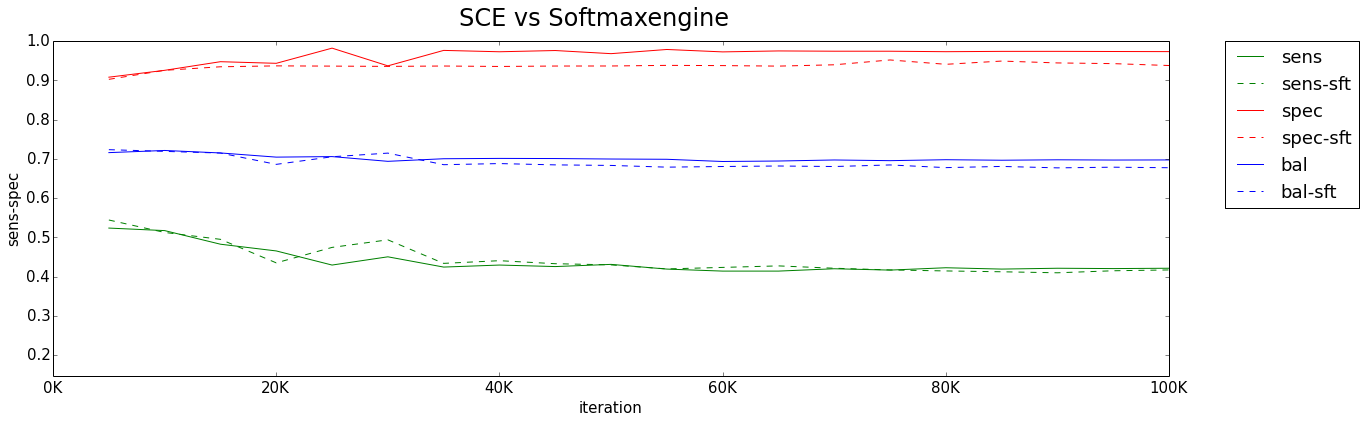

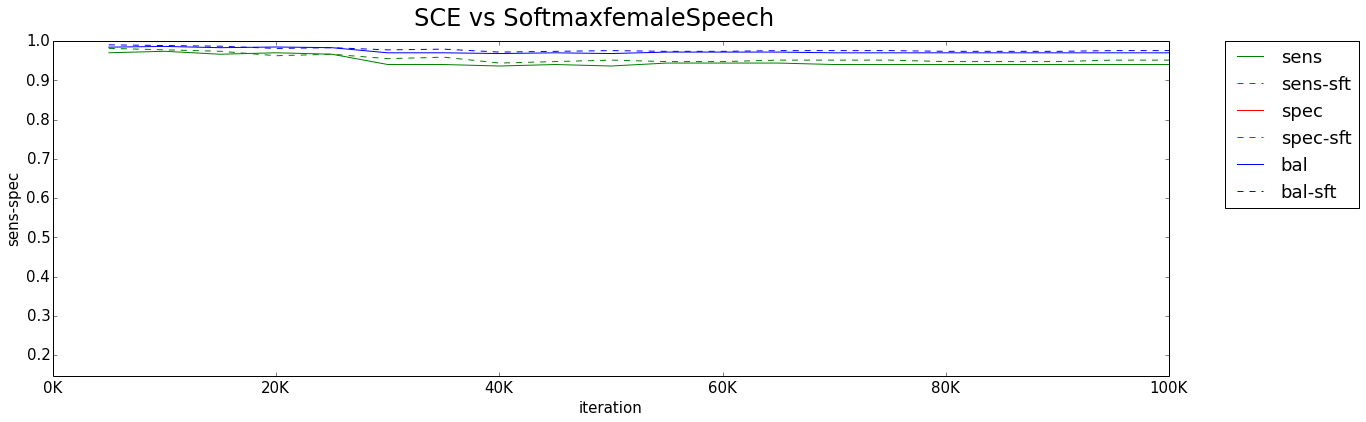

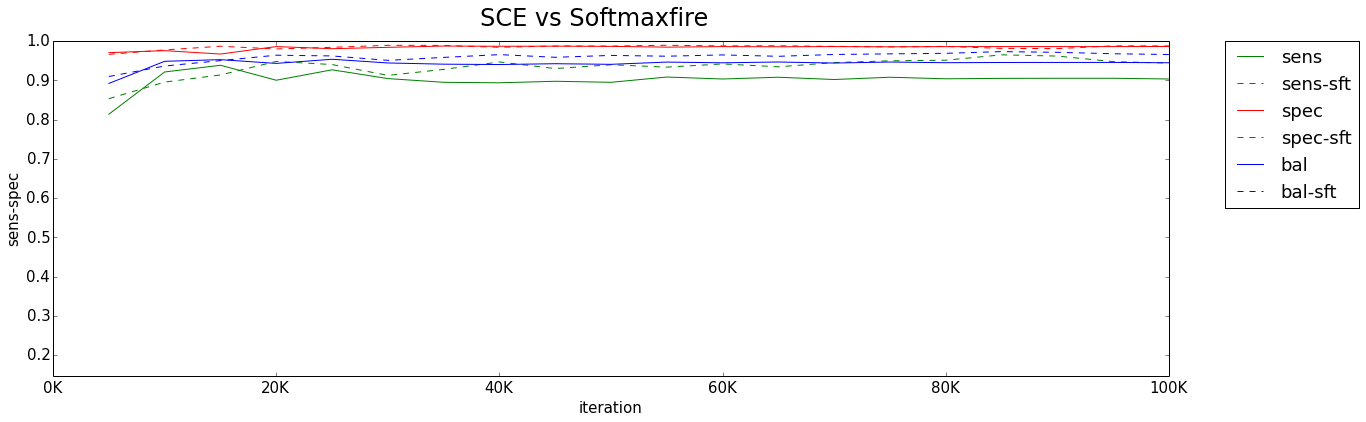

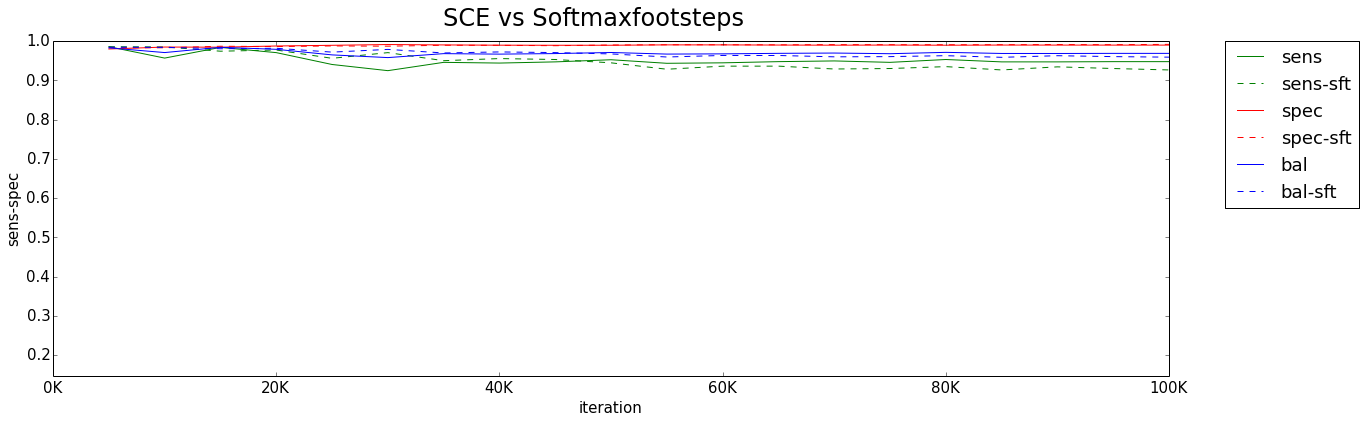

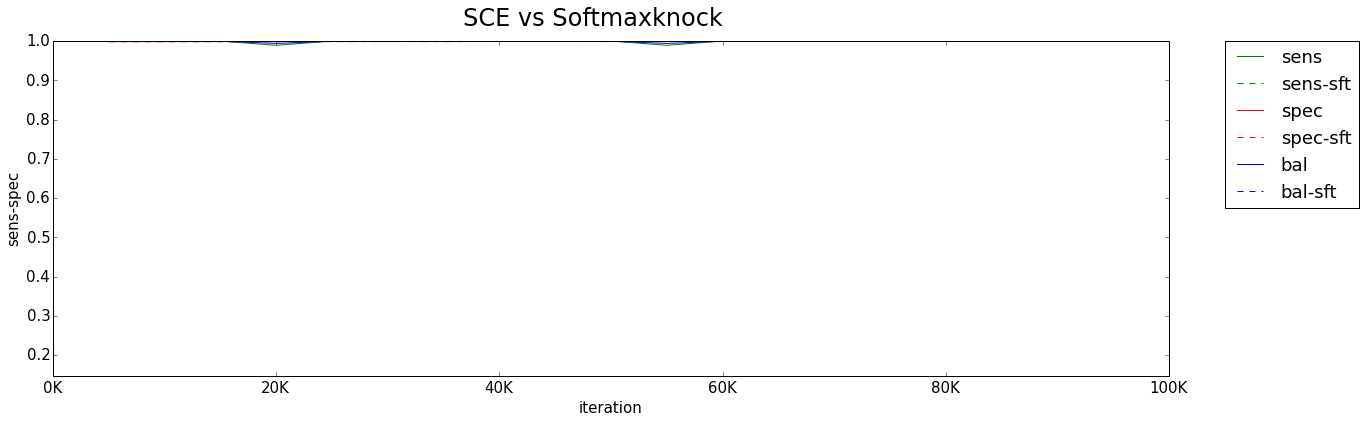

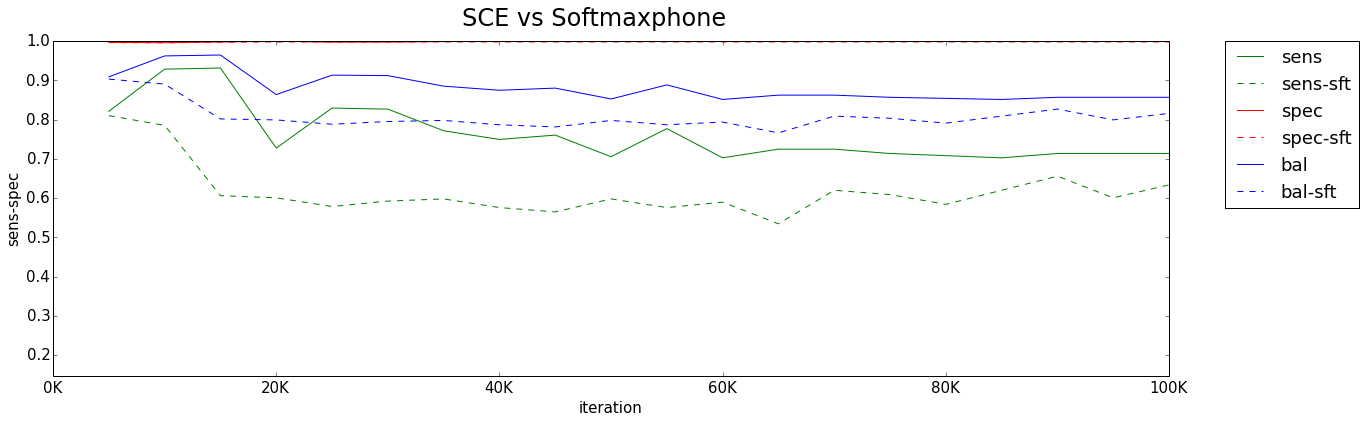

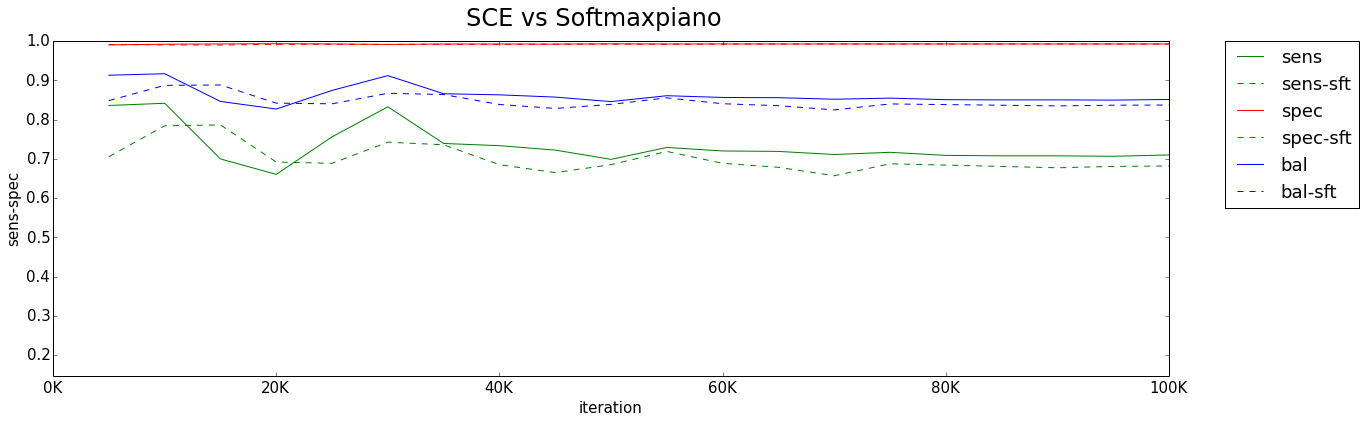

In [70]:
#####################plot#####################
K = len(soundTypes)  #get number of class labels

#get y aixs range
accValues = np.concatenate((sens_list,
                           sens_list_SCE,
                           spec_list,
                           spec_list_SCE,
                          bal_acclist,
                          bal_acclist_SCE))
minY = np.min(accValues)
maxY = np.max(accValues)
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('SCE vs Softmax'+soundTypes[s],fontsize=24)
    
    plt.plot(it_list_SCE, sens_list_SCE[:,s],color='green',label='sens')
    plt.plot(it_list, sens_list[:,s],'--',color='green',label='sens-sft')

    
    plt.plot(it_list_SCE, spec_list_SCE[:,s], color='red',label='spec')
    plt.plot(it_list, spec_list[:,s],'--',color='red',label='spec-sft')
    
    plt.plot(it_list_SCE, bal_acclist_SCE[:,s],color='blue',label='bal')
    plt.plot(it_list, bal_acclist[:,s],'--',color='blue',label='bal-sft')
    
    plt.xlabel('iteration')
    plt.ylabel('sens-spec')
    
    plt.ylim((minY,maxY))
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
#     plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')

    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
#     print '\t SCE \t SCE_ndrp '
    print '\t Sft \t \t SCE_ft '
    print 'sens\t %f \t %f'%(sens_list[-1,s],sens_list_SCE[-1,s])
    print 'spec \t %f \t %f'%(spec_list[-1,s],spec_list_SCE[-1,s])
    print 'bal \t %f \t %f'%(bal_acclist[-1,s],bal_acclist_SCE[-1,s])

In [68]:
from scipy.stats import ttest_rel
SCE_sample = bal_acclist_ns[-1]
SCE_ft_sample = bal_acclist_SCE[-1]
print SCE_sample
print SCE_ft_sample
t_stat,p = ttest_rel(SCE_sample,SCE_ft_sample)
print 't_stat:%f \t prob:%f'%(t_stat,p)

[ 0.65912207  0.9699738   0.86271034  0.96699827  0.67874229  0.98110256
  0.97279168  0.98474605  0.99881301  0.86411816  0.89977987]
[ 0.57563206  0.96676262  0.81943962  0.93811684  0.69709976  0.96988796
  0.94459898  0.96849467  0.9994065   0.85662065  0.85114166]
t_stat:2.704802 	 prob:0.022130


# 3. SoftmaxWithLoss(One-Against-All)

**with dropout**

In [40]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/15/deploy_unbal.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/15/te'
soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
it_list_ns,sens_list_ns,spec_list_ns,bal_acclist_ns = sensSpec.getSensSpecNoSlicing(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/15/te_unbal',
                                                      s_flag=False,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results15.npy'
tmpdata = np.array([sens_list_ns,spec_list_ns,bal_acclist_ns])
np.save(saveFileName,tmpdata)

20 model files


**without dropout**

In [42]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/17/deploy_unbal.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/17/te'
soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
it_list_nn,sens_list_nn,spec_list_nn,bal_acclist_nn = sensSpec.getSensSpecNoSlicing(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/17/te_unbal',
                                                      s_flag=False,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)
saveFileName='/mnt/antares_raid/home/cindy/adhara/experiments/result/results17.npy'
tmpdata = np.array([sens_list_nn,spec_list_nn,bal_acclist_nn])
np.save(saveFileName,tmpdata)

20 model files


### Plotting

last iteration acc-measurements for alarm
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.177246 	 0.585629 	 0.320958 	 0.396407
spec 	 0.997899 	 0.993522 	 0.997286 	 0.995973
bal 	 0.587572 	 0.789575 	 0.659122 	 0.696190
last iteration acc-measurements for baby
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.950298 	 0.905567 	 0.958250 	 0.946322
spec 	 0.995854 	 0.988665 	 0.981697 	 0.981962
bal 	 0.973076 	 0.947116 	 0.969974 	 0.964142
last iteration acc-measurements for crash
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.705247 	 0.711420 	 0.763889 	 0.592593
spec 	 0.974904 	 0.975773 	 0.961532 	 0.971257
bal 	 0.840076 	 0.843596 	 0.862710 	 0.781925
last iteration acc-measurements for dog
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.874346 	 0.892670 	 0.937173 	 0.937173
spec 	 0.999099 	 0.998712 	 0.996824 	 0.997596
bal 	 0.936722 	 0.945691 	 0.966998 	 0.967385
last iteration acc-measurements for engine
	 drp-slc 	 ndrp-slc 	 drp-nslc 

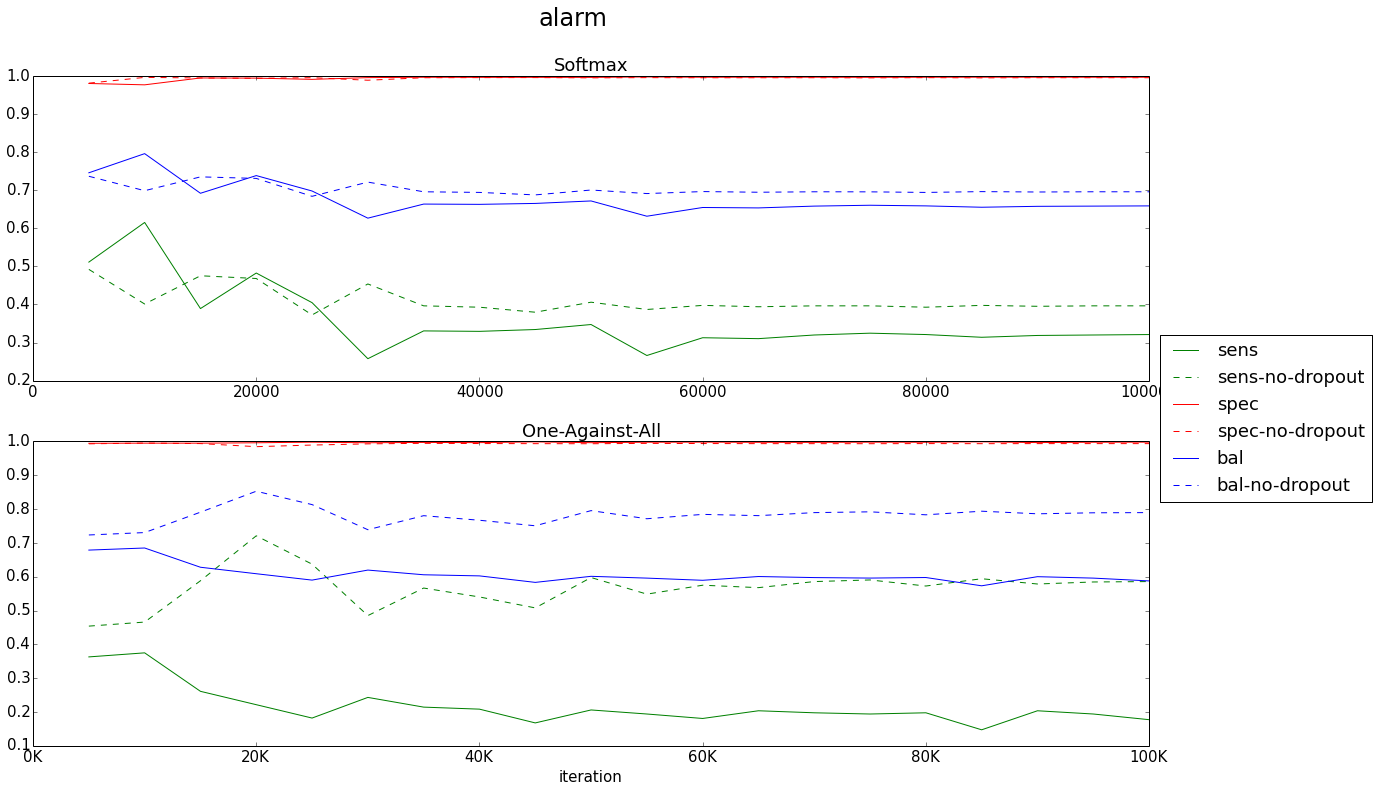

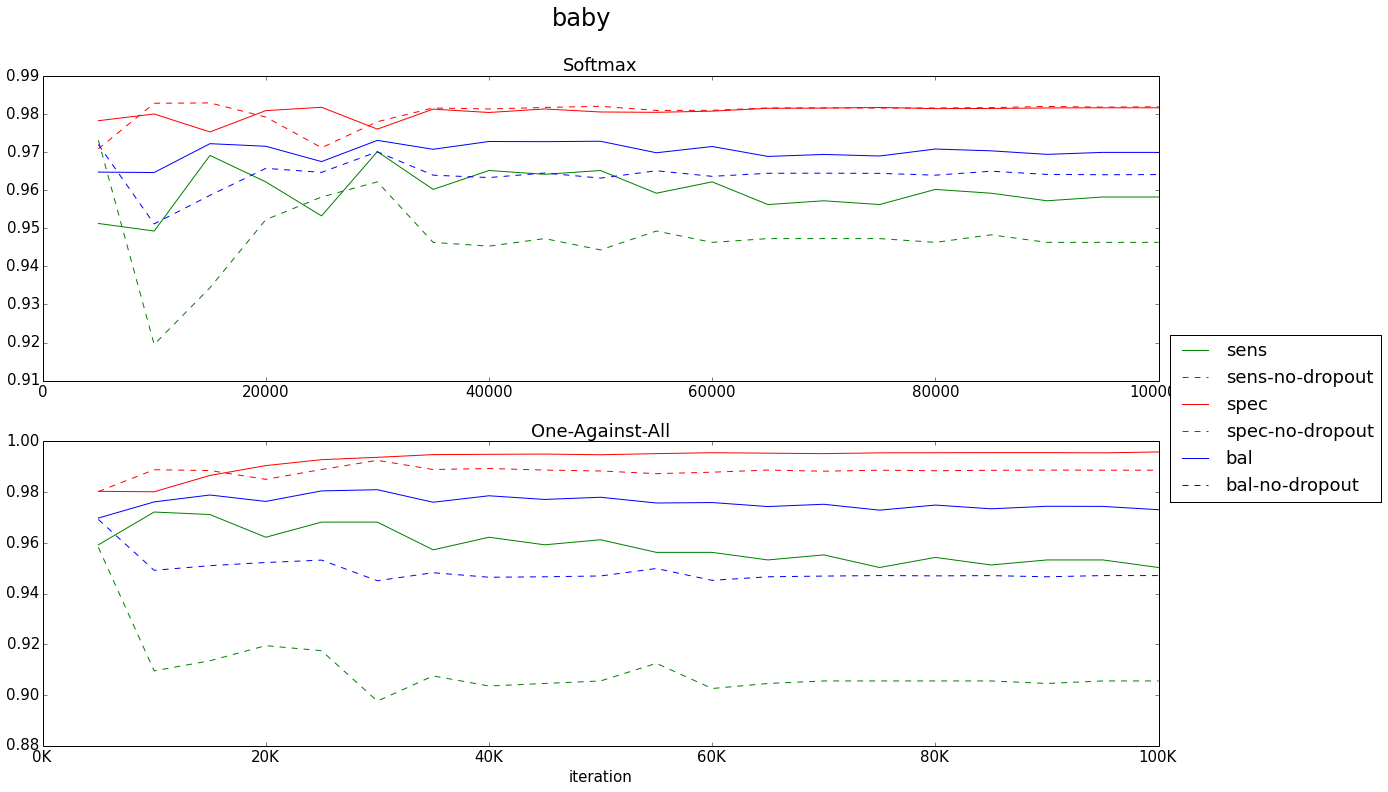

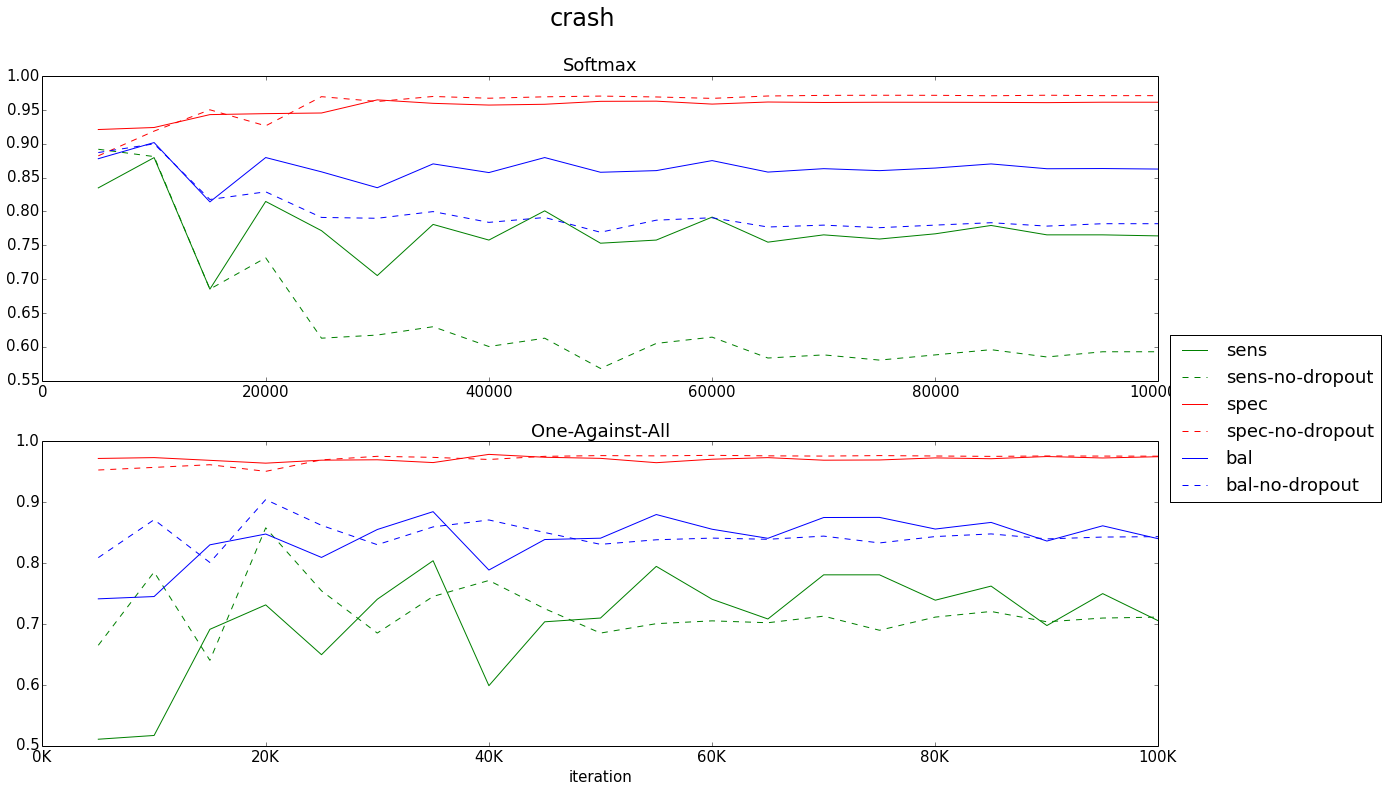

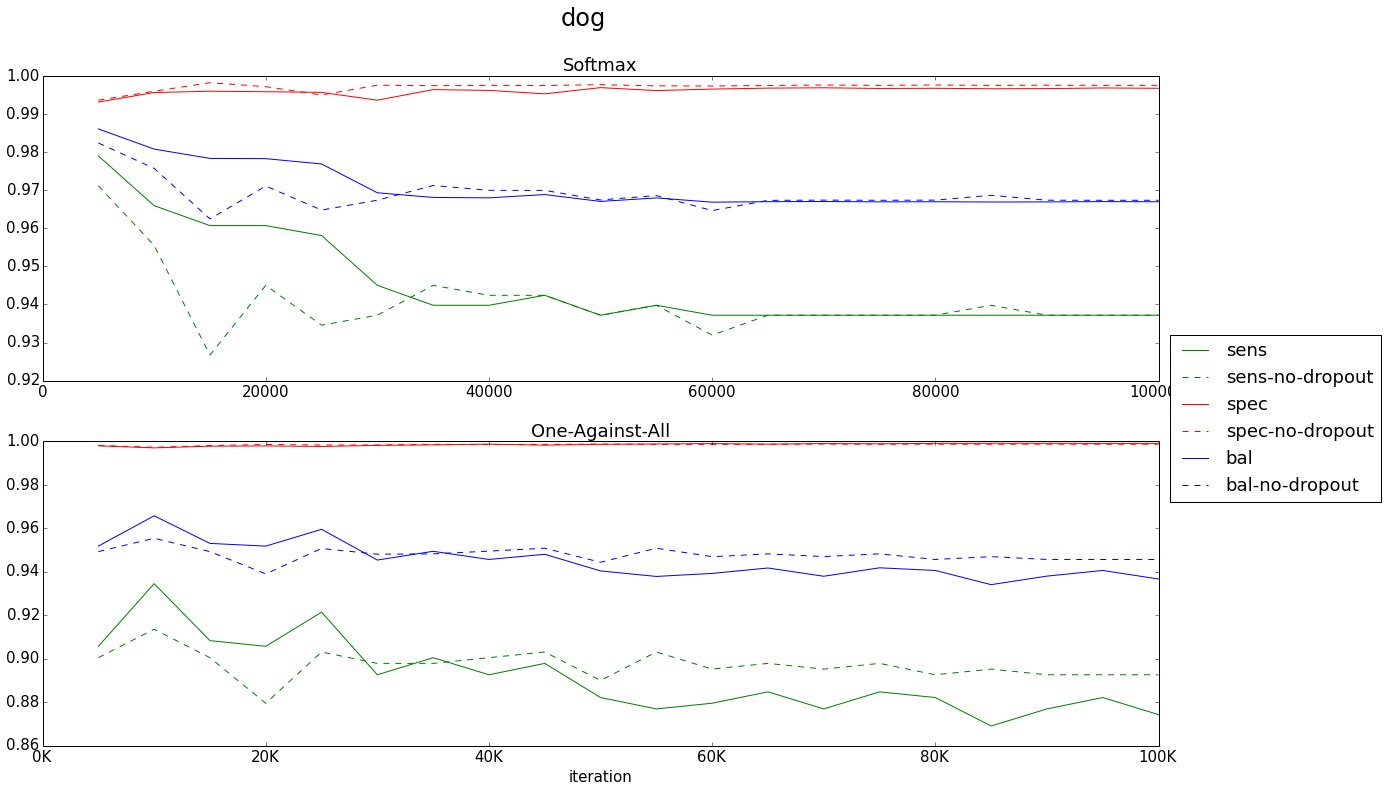

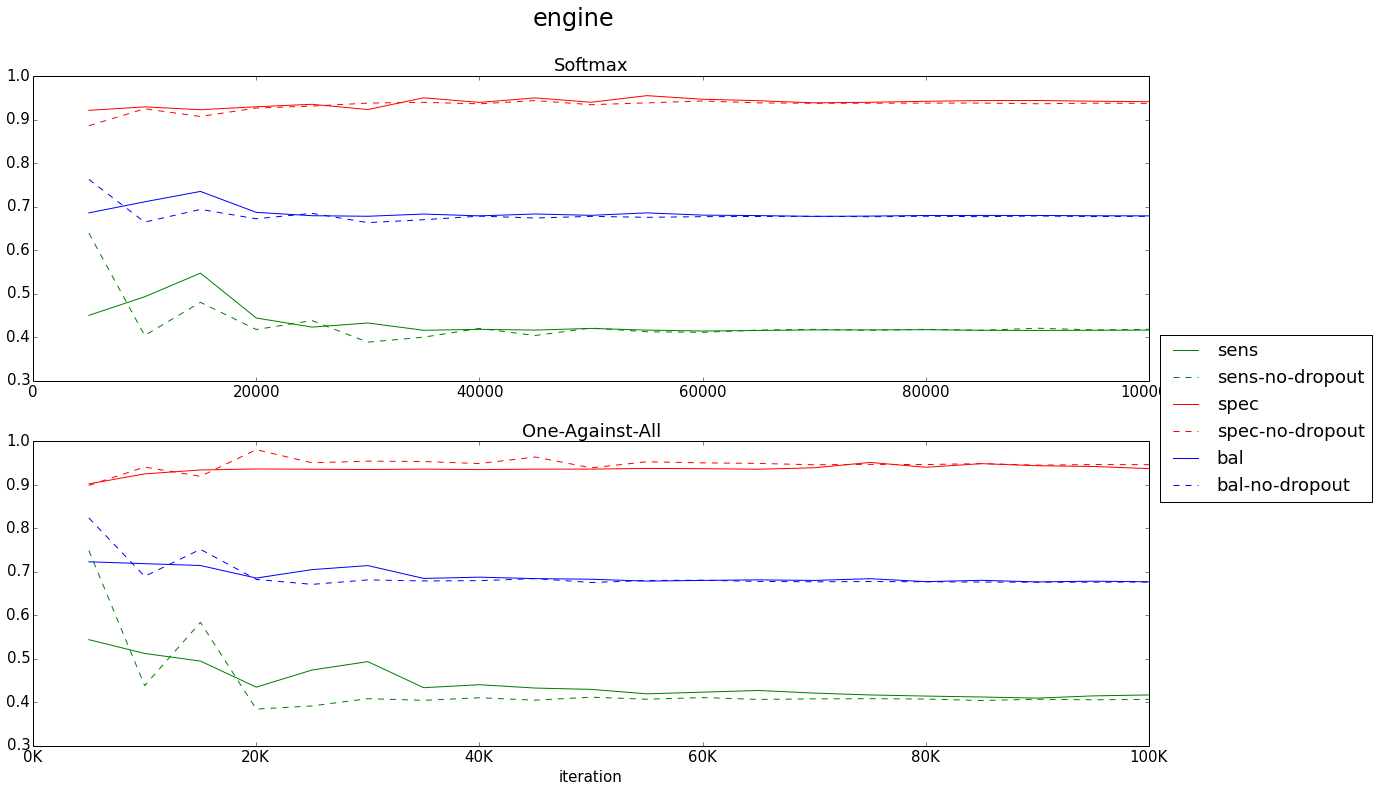

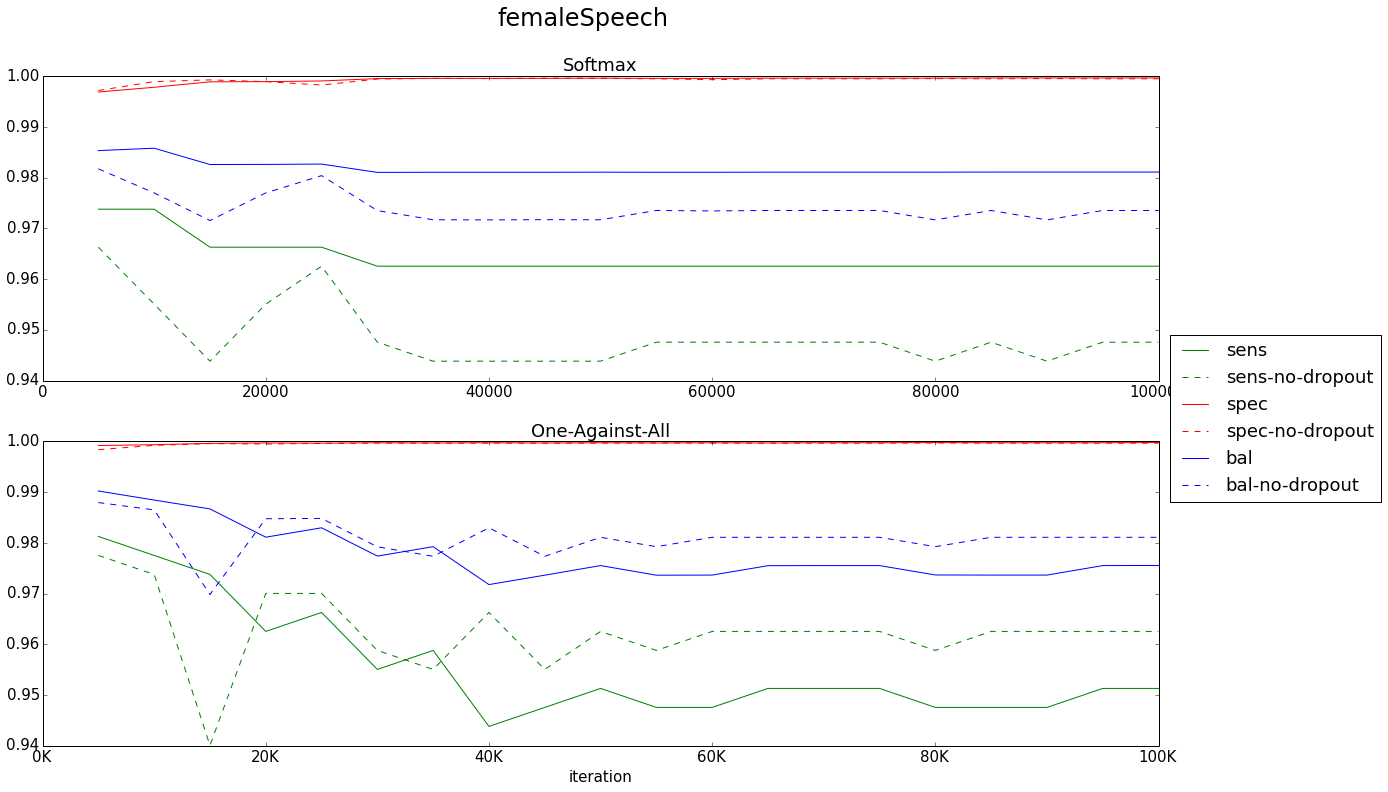

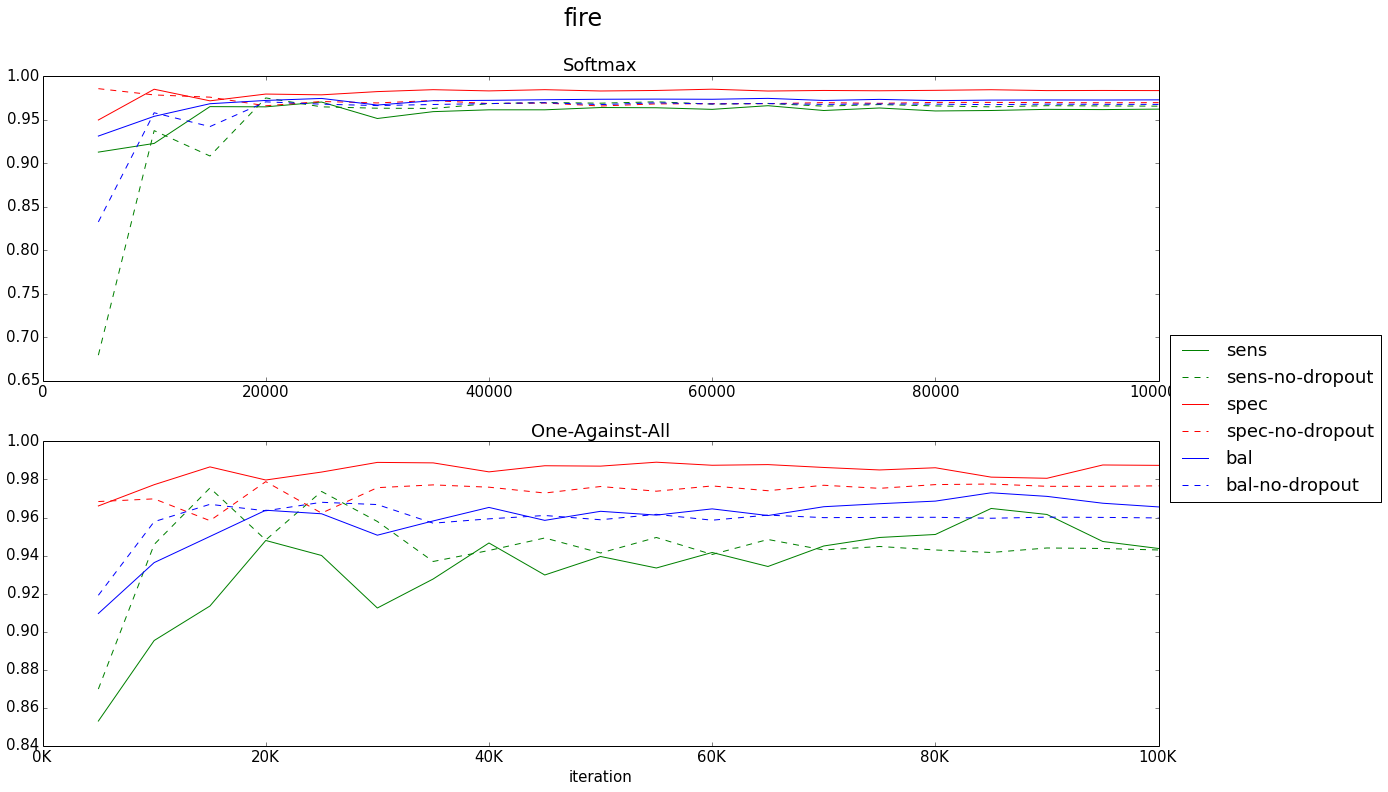

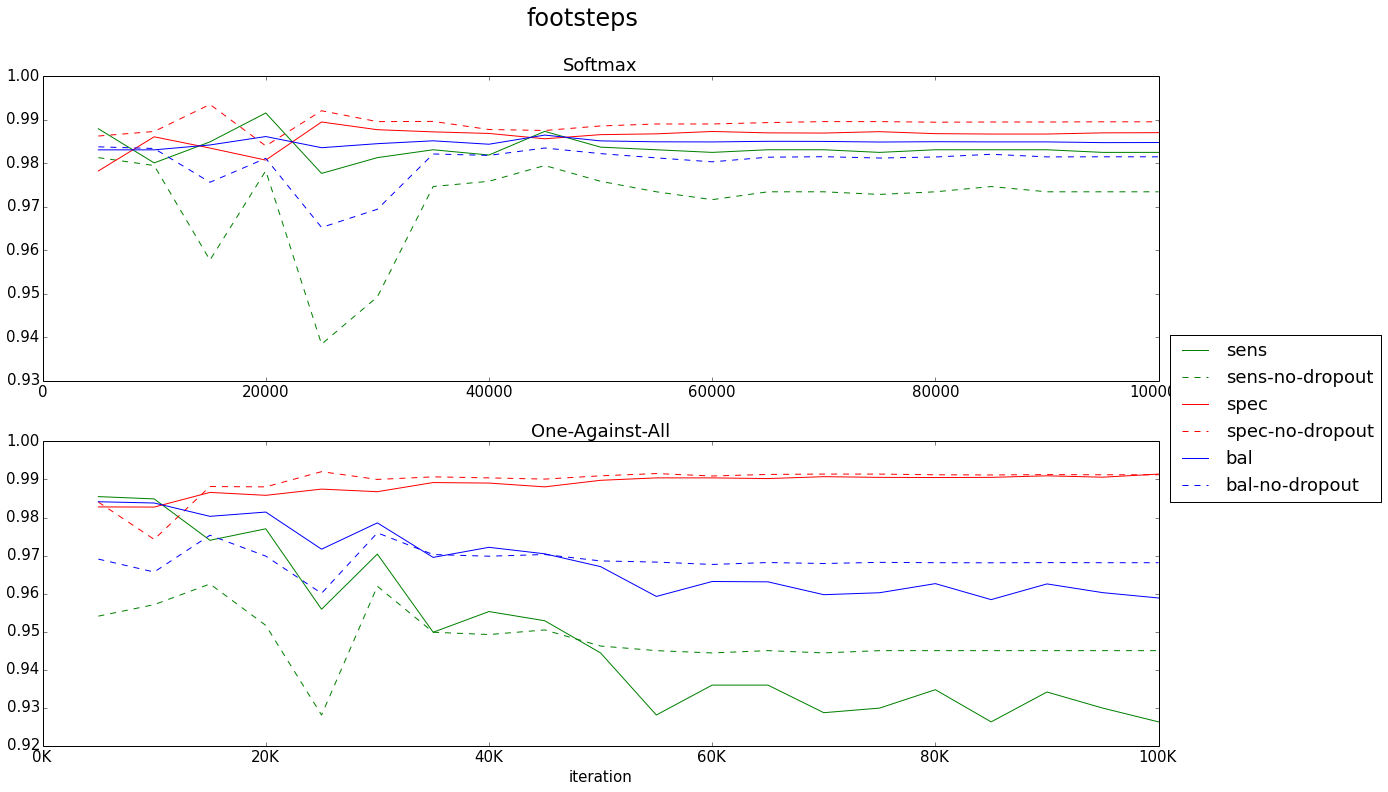

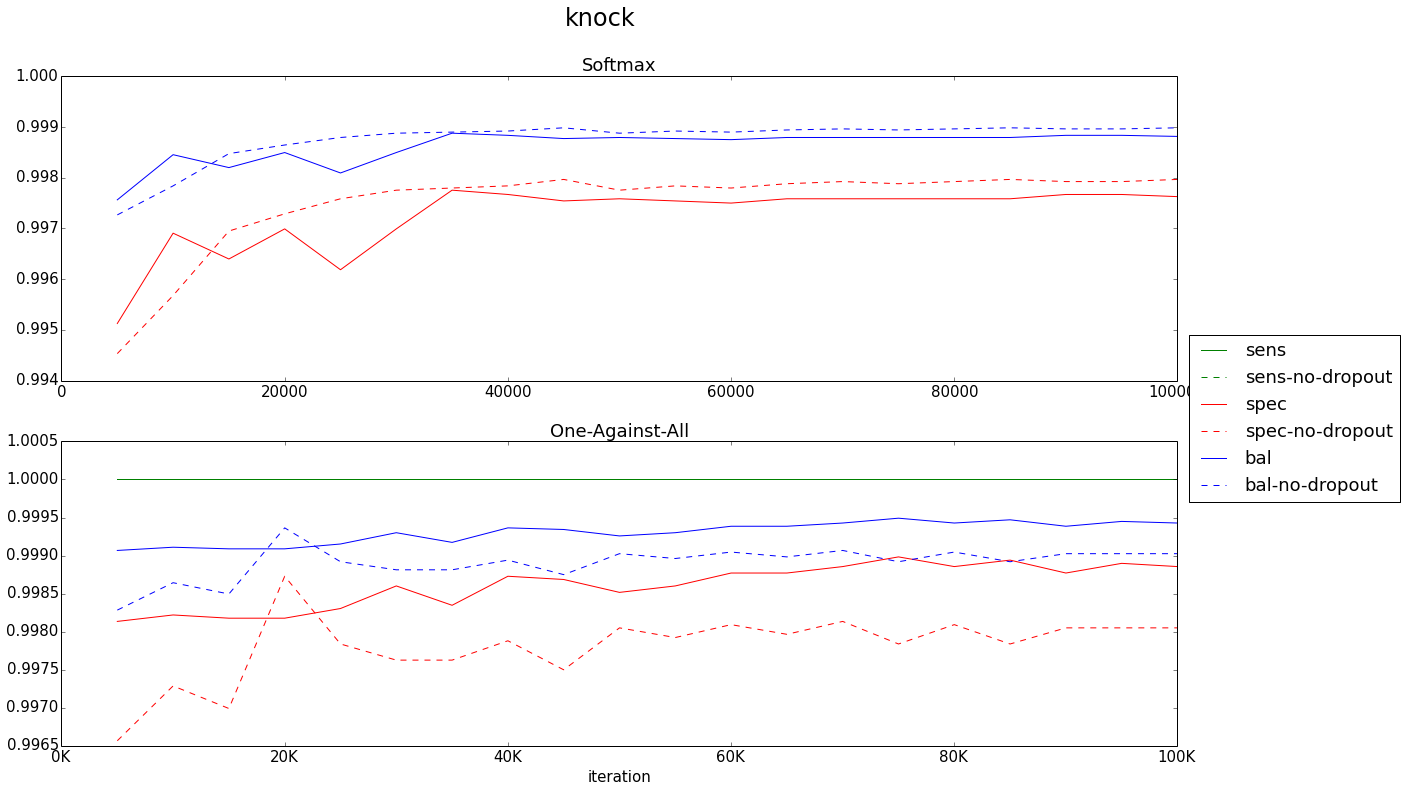

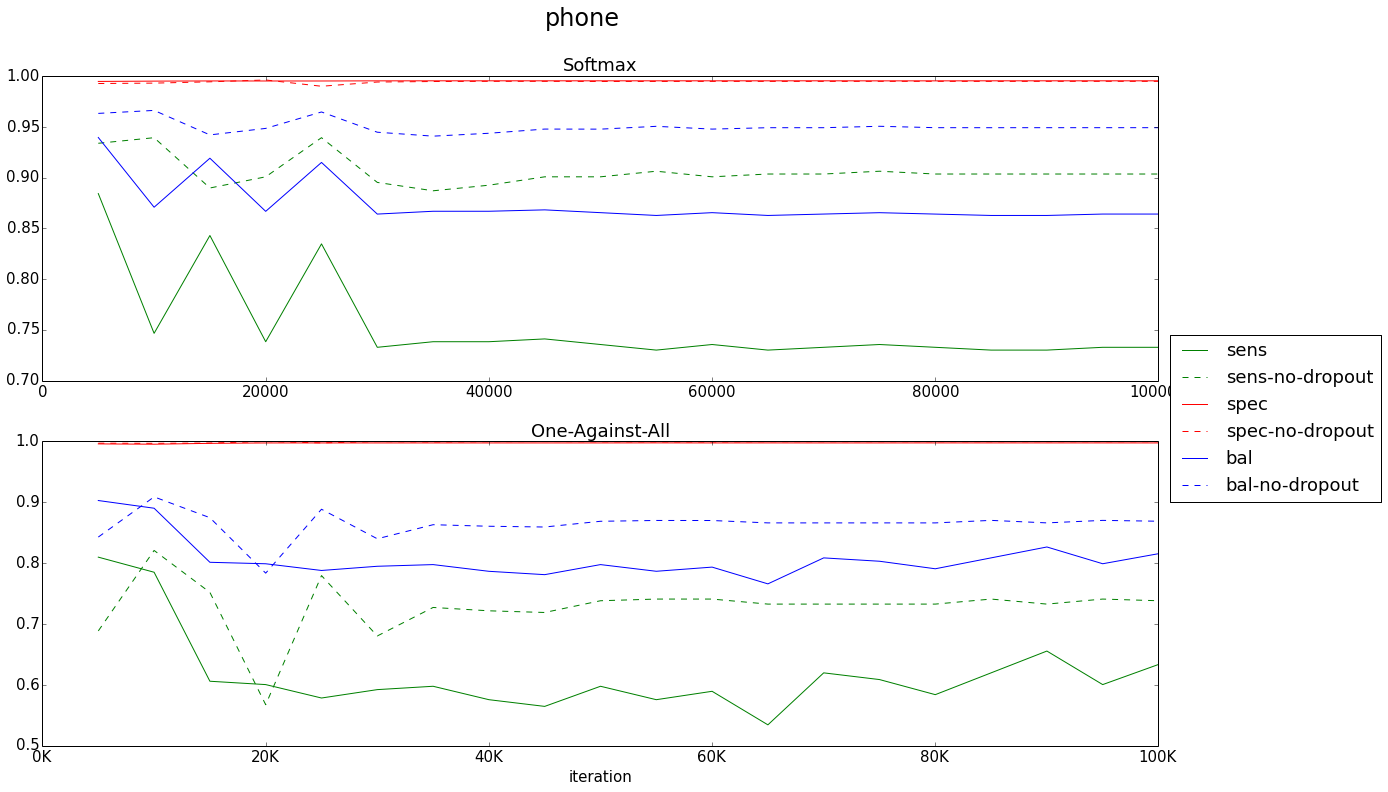

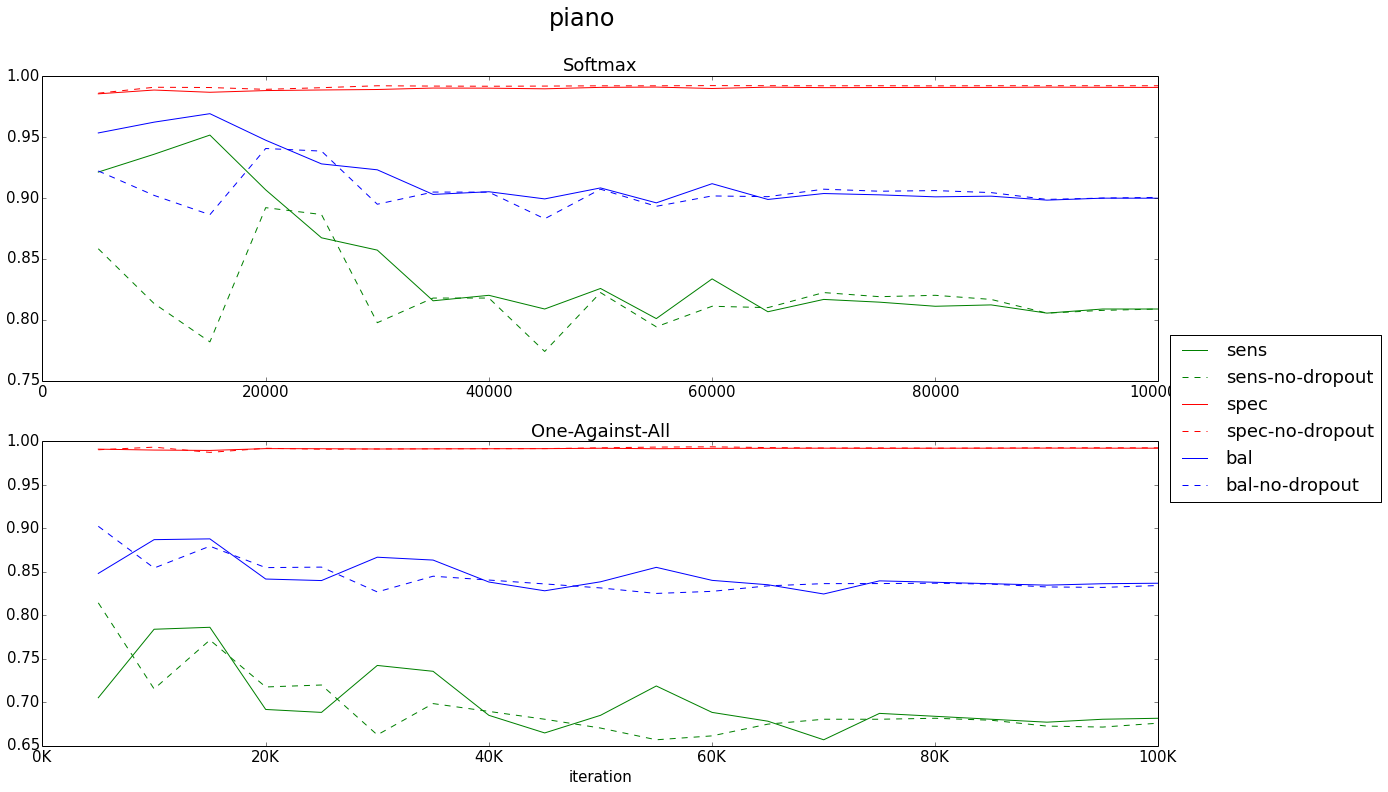

In [14]:
import time

root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/plots/SoftmaxWithLoss/'

#####################plot#####################
K = len(soundTypes)  #get number of class labels
for s in range(K):
    fig = plt.figure(figsize=(20,12))
    fig.suptitle(soundTypes[s],fontsize=24)

    # Returns the Axes instance
    ax = fig.add_subplot(211) 
    ax2 = fig.add_subplot(212) 
    
    ax.set_title('Softmax',fontsize=18)
    
    ax.plot(it_list_ns, sens_list_ns[:,s],color='green',label='sens')
    ax.plot(it_list_nn, sens_list_nn[:,s],'--',color='green',label='sens-no-dropout')
    
    ax.plot(it_list_ns, spec_list_ns[:,s], color='red',label='spec')
    ax.plot(it_list_nn, spec_list_nn[:,s], '--',color='red',label='spec-no-dropout')
    
    ax.plot(it_list_ns, bal_acclist_ns[:,s],color='blue',label='bal')
    ax.plot(it_list_nn, bal_acclist_nn[:,s], '--',color='blue',label='bal-no-dropout')
    
    
    ax2.set_title('One-Against-All',fontsize=18)
    
    ax2.plot(it_list, sens_list[:,s],color='green', label='sens')
    ax2.plot(it_list_nd, sens_list_nd[:,s],'--',color='green',label='sens-no-dropout')
    
    ax2.plot(it_list, spec_list[:,s], color='red',label='spec')
    ax2.plot(it_list_nd, spec_list_nd[:,s], '--',color='red',label='spec-no-dropout')
    
    ax2.plot(it_list, bal_acclist[:,s], color='blue',label='bal')
    ax2.plot(it_list_nd, bal_acclist_nd[:,s], '--',color='blue',label='bal-no-dropout')
    
    
    ax2.set_xlabel('iteration')
    # format x-axis ticks
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.01, 1.35), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
    plt.savefig(root_path+'/acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')
    
    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
    print '\t drp-slc \t ndrp-slc \t drp-nslc \t ndrp-nslc'
    print 'sens \t %f \t %f \t %f \t %f'%(sens_list[-1,s],sens_list_nd[-1,s],sens_list_ns[-1,s],sens_list_nn[-1,s])
    print 'spec \t %f \t %f \t %f \t %f'%(spec_list[-1,s],spec_list_nd[-1,s],spec_list_ns[-1,s],spec_list_nn[-1,s])
    print 'bal \t %f \t %f \t %f \t %f'%(bal_acclist[-1,s],bal_acclist_nd[-1,s],bal_acclist_ns[-1,s],bal_acclist_nn[-1,s])

### learning-curve from log-files

log_path = root_path+'caffe.INFO'

e = LearningCurve(log_path)
e.parse()

soundtypes=['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']

K = len(soundtypes)  #get number of class labels
# calculate average accuracy and loss
total_loss_test = e.list('loss01', Phase.TEST)
total_loss_train = e.list('loss01',Phase.TRAIN)
##TODO: currently just use the test accuracy
total_accuracy_test = e.list('acc01',Phase.TEST)
# total_accuracy_train = e.list('acc01',Phase.TRAIN)
for s in range(K):
    plt.figure()
    for phase in [Phase.TRAIN, Phase.TEST]:    
        num_iter = e.list('NumIters', phase)
        loss = e.list('loss'+str(s+1).zfill(2), phase)
        if s!=0:
            if phase==Phase.TRAIN:
                total_loss_train += loss
            else:
                total_loss_test += loss
 
        plt.plot(num_iter, loss, label='on %s set' % (phase,))
        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
    
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('loss')
        #plt.title(e.name())
        plt.title(soundtypes[s])
        plt.legend()
        plt.savefig(root_path+'plots/loss'+str(s+1).zfill(2)+soundtypes[s]+'.png')
    plt.figure()
    num_iter = e.list('NumIters', Phase.TEST)
    acc = e.list('acc'+str(s+1).zfill(2), phase)
    if s!=0:
        if phase==Phase.TEST:
            total_accuracy_test += acc
    plt.plot(num_iter, acc, label='on %s set' % (phase,))

    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.title(soundtypes[s])
  
    plt.legend(loc='lower right')
    plt.grid()
    plt.savefig(root_path+'plots/accuracy'+str(s+1).zfill(2)+soundtypes[s]+'.png')
